# Proyek Analisis Data: Bike Sharing
- Nama: Salsa Zufar Radinka Akmal
- Email: salsazufar@gmail.com  
- Id Dicoding: salsazufar

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda berdasarkan musim?
- Apakah ada perubahan dalam jumlah peminjaman sepeda pada hari libur (holiday) dibandingkan dengan hari biasa (workingday)?
- Bagaimana pola peminjaman sepeda berdasarkan jam, hari, bulan?
- Apakah ada pengaruh cuaca (weathersit) terhadap jumlah peminjaman sepeda?

## Menyaipkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('./data/day.csv')
hour_df = pd.read_csv('./data/hour.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

##### Menilai Data day_df

In [3]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Tipe data pada kolom dteday masih tidak sesuai, tipe data yang sesuai untuk dteday adalah datetime.

In [4]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak terdapat missing value pada semua kolom.

In [5]:
print("Jumlah duplikasi : ", day_df.duplicated().sum())

Jumlah duplikasi :  0


Tidak ada data yang duplikat

In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Value pada semua kolom sudah sesuai, sehingga tidak terdapat inaccurate value.

##### Menilai Data hour_df

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Tipe data pada kolom dteday masih tidak sesuai, tipe data yang sesuai untuk dteday adalah datetime.

In [8]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak terdapat missing value pada semua kolom.

In [9]:
print("Jumlah duplikasi : ", hour_df.duplicated().sum())

Jumlah duplikasi :  0


In [10]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak tedapat duplikasi pada semua data

### Cleaning Data

#### Membersihkan data day_df

- Mengubah tipe data pada kolom dteday

In [11]:
datetime_columns = ["dteday"]
for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])

In [12]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Membersihkan data hour_df

- Mengubah tipe data pada kolom dteday

In [13]:
datetime_columns = ["dteday"]
for column in datetime_columns:
    hour_df[column] = pd.to_datetime(hour_df[column])

In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

- Menggabungkan data frame day dan hour

In [15]:
all_df = day_df.merge(hour_df, how='inner', on='dteday', suffixes=('_day', '_hour'))

In [16]:
pd.set_option('display.max_columns', None)
all_df.head(10)

,instant_day,dteday,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,instant_hour,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,6,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,7,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,8,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,9,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,10,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [17]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- Bagaimana tren penggunaan sepeda berdasarkan musim?

In [18]:
all_df.groupby("season_day")["cnt_day"].sum().sort_values(ascending=False)

season_day
3    25420803
2    22024071
4    20167029
1    11179147
Name: cnt_day, dtype: int64

In [19]:
all_df.groupby(by='season_day').agg({
    "cnt_day" : "mean"
}).sort_values(by="cnt_day", ascending=False)

,cnt_day
season_day,
3,5654.093194
2,4995.253119
4,4765.366021
1,2635.348185


In [20]:
all_df.groupby(by='season_day').agg({
    "casual_day" : "sum",
    "registered_day" : "sum",
    "cnt_day" : "sum"
}).sort_values(by="cnt_day", ascending=False)

,casual_day,registered_day,cnt_day
season_day,,,
3,5413876,20006927,25420803
2,4880685,17143386,22024071
4,3112501,17054528,20167029
1,1440508,9738639,11179147


In [21]:
all_df.groupby(by='season_day').agg({
    "hr" : lambda x: round(x.mean()),
})

,hr
season_day,
1,12
2,12
3,12
4,12


In [22]:
all_df.groupby(by='season_day').agg({
    "workingday_day": [("sum_workingday", "sum"), ("sum_not_workingday", lambda x: (x == 0).sum())],
    "cnt_day": "count"
})

workingday_day                    cnt_day
           sum_workingday sum_not_workingday   count
season_day                                          
1                    2794               1448    4242
2                    3066               1343    4409
3                    3141               1355    4496
4                    2864               1368    4232

- Apakah ada perubahan dalam jumlah peminjaman sepeda pada hari libur (holiday) dibandingkan dengan hari biasa (workingday)?


In [23]:
all_df.head()

,instant_day,dteday,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,instant_hour,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [24]:
all_df.groupby(by="workingday_day").agg({
    "cnt_day"  : "sum"
})

,cnt_day
workingday_day,
0,23940873
1,54850177


In [25]:
all_df.groupby(by="workingday_day").agg({
    "cnt_day"  : "mean"
})

,cnt_day
workingday_day,
0,4341.834059
1,4622.855204


In [26]:
all_df.groupby(by="workingday_day").agg({
    "cnt_hour"  : "sum"
})

,cnt_hour
workingday_day,
0,1000269
1,2292410


In [27]:
all_df.groupby(by="workingday_day").agg({
    "cnt_hour" : "mean",
    "hr" : lambda x: round(x.mean())
})

,cnt_hour,hr
workingday_day,,
0,181.405332,12
1,193.207754,12


In [28]:
all_df.groupby(by="workingday_day").agg({
    "casual_day" : "sum",
    "registered_day" : "sum",
    "cnt_day" : "sum"
}).sort_values(by="cnt_day", ascending=False)

,casual_day,registered_day,cnt_day
workingday_day,,,
1,7264775,47585402,54850177
0,7582795,16358078,23940873


- Bagaimana pola peminjaman sepeda berdasarkan hari dalam seminggu (weekday)?

In [29]:
all_df.head()

,instant_day,dteday,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,instant_hour,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [30]:
all_df.groupby(by="weekday_day").agg({
    "cnt_day" : "sum"
}).sort_values(by="cnt_day", ascending=False)

,cnt_day
weekday_day,
5,11690985
4,11622357
6,11458599
3,11322158
2,11202135
1,10887572
0,10607244


In [31]:
all_df.groupby(by="weekday_day").agg({
    "cnt_day" : "mean"
}).sort_values(by="cnt_day", ascending=False)

,cnt_day
weekday_day,
4,4703.503440
5,4700.838359
3,4574.609293
2,4566.708113
6,4561.544188
1,4391.920936
0,4239.505995


In [32]:
all_df.groupby(by="mnth_day").agg({
    "cnt_day" : "mean"
}).sort_values(by="cnt_day", ascending=False)

,cnt_day
mnth_day,
6,5772.366667
9,5772.107864
8,5689.239322
7,5563.677419
5,5349.774194
10,5319.965541
4,4484.418928
11,4245.956159
3,3709.164969


In [33]:
all_df.groupby(by="hr").agg({
    "cnt_hour" : "mean"
}).sort_values(by="cnt_hour", ascending=False)

,cnt_hour
hr,
17,461.452055
18,425.510989
8,359.011004
16,311.983562
19,311.523352
13,253.661180
12,253.315934
15,251.233196
14,240.949246


- Apakah ada pengaruh cuaca (weathersit) terhadap jumlah peminjaman sepeda?

In [34]:
all_df.head()

,instant_day,dteday,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,instant_hour,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [35]:
all_df.groupby(by="weathersit_day").agg({
    "cnt_day": "sum"
}).sort_values(by="cnt_day", ascending=False)

,cnt_day
weathersit_day,
1,54042755
2,23852215
3,896080


In [36]:
all_df.groupby(by="weathersit_day").agg({
    "cnt_day": "mean"
}).sort_values(by="cnt_day", ascending=False)

,cnt_day
weathersit_day,
1,4895.177083
2,4062.717595
3,1914.700855


In [37]:
all_df.groupby(by="weathersit_day").agg({
    "casual_day" : "sum",
    "registered_day" : "sum"
})

,casual_day,registered_day
weathersit_day,,
1,10688027,43354728
2,4067084,19785131
3,92459,803621


In [38]:
all_df.groupby(by="weathersit_day").agg({
    "weekday_day" : lambda x: round(x.mean())
})

,weekday_day
weathersit_day,
1,3
2,3
3,3


In [39]:
all_df.groupby(by="weathersit_day").agg({
    "hr" : lambda x: round(x.mean())
})

,hr
weathersit_day,
1,12
2,12
3,11


In [40]:
all_df.groupby(by="weathersit_day").agg({
    "workingday_day": lambda x: x.sum() if (x == 1).any() else np.nan
})

,workingday_day
weathersit_day,
1,7316
2,4201
3,348


In [41]:
all_df.groupby(by='weathersit_day').agg({
    "workingday_day": [("sum_workingday", "sum"), ("sum_not_workingday", lambda x: (x == 0).sum())],
    "cnt_day": "count"
})

workingday_day                    cnt_day
               sum_workingday sum_not_workingday   count
weathersit_day                                          
1                        7316               3724   11040
2                        4201               1670    5871
3                         348                120     468

In [42]:
all_df["weathersit_day"].nunique()

3

## Visualization & Explanatory Analysis

### Bagaimana tren penggunaan sepeda berdasarkan musim?

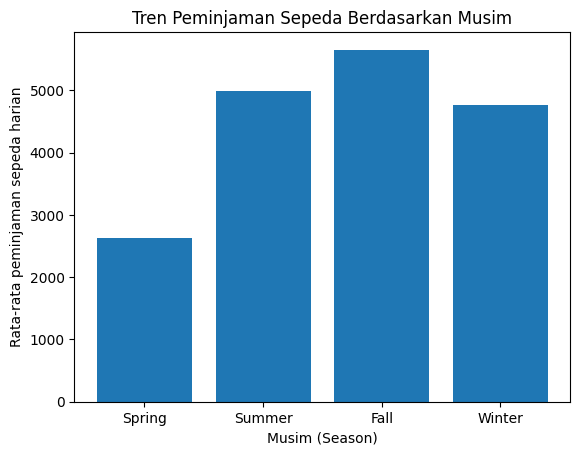

In [43]:
season = ['Spring', 'Summer', 'Fall', 'Winter']
tren_musim = all_df.groupby('season_day')['cnt_day'].mean()
plt.bar(season, tren_musim)
plt.title('Tren Peminjaman Sepeda Berdasarkan Musim')
plt.ylabel('Rata-rata peminjaman sepeda harian')
plt.xlabel('Musim (Season)')
plt.show()

### Apakah ada perubahan dalam jumlah peminjaman sepeda pada hari libur (holiday) dibandingkan dengan hari biasa (workingday)?

In [ ]:
all_df.groupby(by="workingday_day").agg({
    "cnt_day"  : "mean"
})

,cnt_day
workingday_day,
0,4341.834059
1,4622.855204


[Text(0, 0, 'Hari Libur'), Text(1, 0, 'Hari Kerja')]

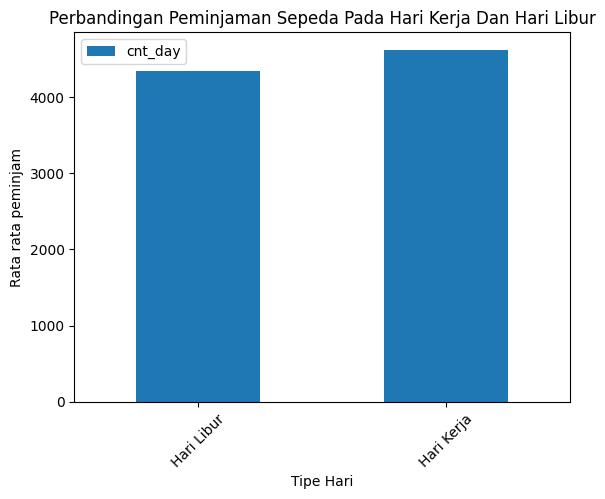

In [ ]:
data_workingday = all_df.groupby(by="workingday_day").agg({
    "cnt_day"  : "mean"
})
data_workingday = data_workingday.rename(index={0: "Hari Libur", 1: "Hari Kerja"})
ax = data_workingday.plot(kind="bar", xlabel='Tipe Hari',ylabel="Rata rata peminjam", title="Perbandingan Peminjaman Sepeda Pada Hari Kerja Dan Hari Libur")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

### Bagaimana pola peminjaman sepeda berdasarkan hari dalam seminggu (weekday)?

- Pola berdasarkan bulan

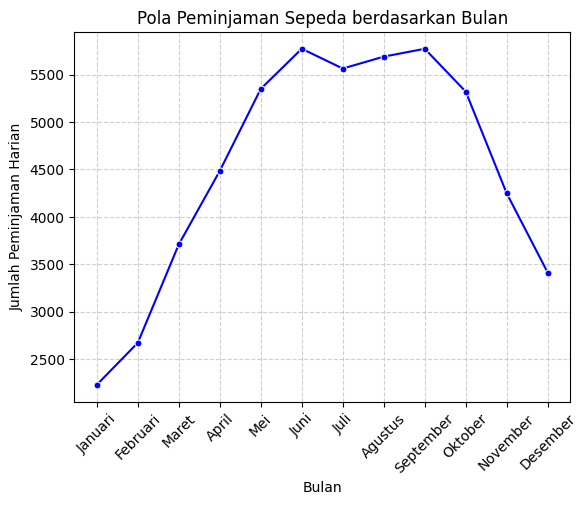

In [ ]:
sns.lineplot(x='mnth_day', y='cnt_day', data=all_df, marker='o', markersize=5, color='b', errorbar=None)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman Harian')
plt.title('Pola Peminjaman Sepeda berdasarkan Bulan')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)  
month_labels = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
plt.xticks(ticks=all_df['mnth_day'].unique(), labels=month_labels)
plt.show()

- Pola berdasarkan Hari

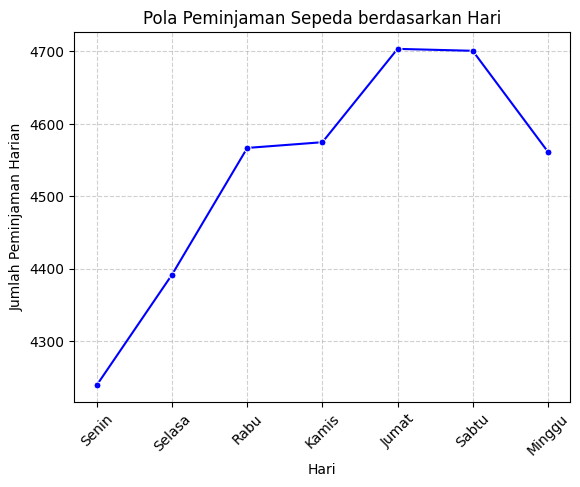

In [ ]:
sns.lineplot(x='weekday_day', y='cnt_day', data=all_df, marker='o', markersize=5, color='b', errorbar=None)
plt.xlabel('Hari')
plt.ylabel('Jumlah Peminjaman Harian')
plt.title('Pola Peminjaman Sepeda berdasarkan Hari')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)  
day_labels = ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu']
plt.xticks(ticks=all_df['weekday_day'].unique(), labels=day_labels)
plt.show()

- Pola berdasarkan jam

In [ ]:
all_df.head()

,instant_day,dteday,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,instant_hour,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


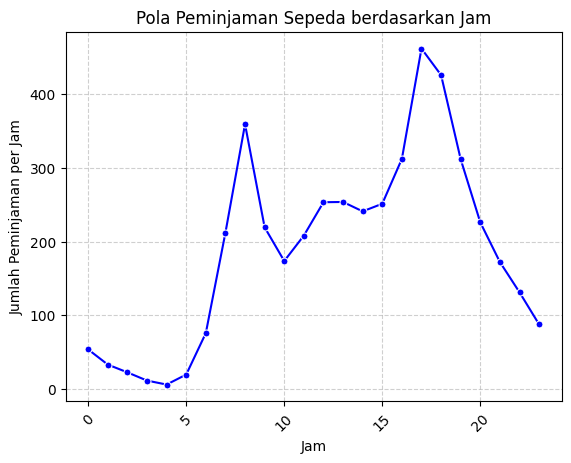

In [ ]:
sns.lineplot(x='hr', y='cnt_hour', data=all_df, marker='o', markersize=5, color='b', errorbar=None)
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman per Jam')
plt.title('Pola Peminjaman Sepeda berdasarkan Jam')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)  
plt.show()

### Apakah ada pengaruh cuaca (weathersit) terhadap jumlah peminjaman sepeda?

Text(0.5, 1.0, 'Pola peminjaman Sepeda berdasarkan Kondisi Cuaca')

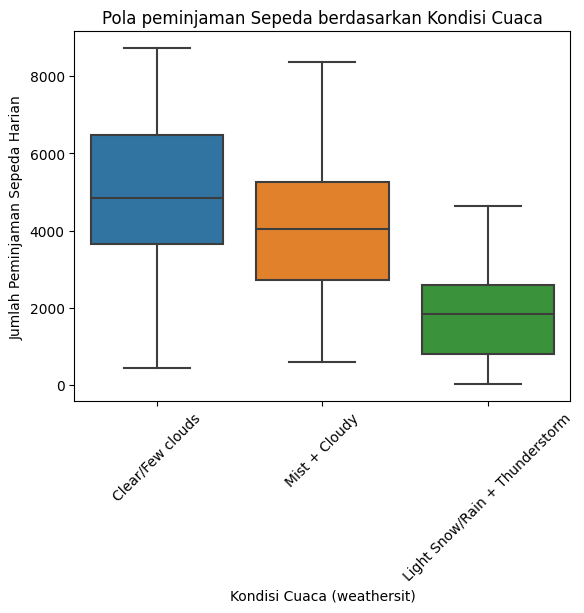

In [ ]:
labels = {
    1: 'Clear/Few clouds',
    2: 'Mist + Cloudy',
    3: 'Light Snow/Rain + Thunderstorm',
    4: 'Heavy Rain + Snow/Fog'
}

sns.boxplot(x='weathersit_day', y='cnt_day', data=all_df)
plt.xticks(ticks=[0, 1, 2], labels=[labels[1], labels[2], labels[3]])
plt.xticks(rotation=45)
plt.xlabel('Kondisi Cuaca (weathersit)')
plt.ylabel('Jumlah Peminjaman Sepeda Harian')
plt.title('Pola peminjaman Sepeda berdasarkan Kondisi Cuaca')

In [ ]:
all_df.to_csv("all_data.csv", index=False)

## Conclusion

### Conclusion for Question 1: Bagaimana tren penggunaan sepeda berdasarkan musim?

Berdasarkan analisis grafik, terlihat bahwa tren peminjaman sepeda mengalami fluktuasi sepanjang tahun, dipengaruhi oleh perubahan musim. Berikut adalah beberapa temuan utama:

- **Musim Fall:** Menunjukkan puncak atau jumlah peminjaman sepeda tertinggi, mencapai level maksimal. Kemungkinan besar, cuaca yang menyenangkan dan kondisi lingkungan yang indah selama musim ini mendorong peningkatan penggunaan sepeda.

- **Musim Spring:** Menunjukkan titik minimum dengan jumlah peminjaman sepeda terendah. Kondisi cuaca yang kurang mengundang untuk bersepeda mungkin menjadi faktor utama penurunan ini.

- **Musim Summer:** Menduduki peringkat kedua dalam jumlah peminjaman sepeda. Penggunaan sepeda tetap tinggi selama musim panas, meskipun tidak mencapai level maksimal seperti pada musim Fall.

- **Musim Winter:** Menempati urutan ketiga dalam jumlah peminjaman sepeda. Kemungkinan cuaca yang lebih dingin dan kurang mengundang mendorong sedikit penurunan dalam penggunaan sepeda.


### Conclution pertanyaan 2 : Apakah ada perubahan dalam jumlah peminjaman sepeda pada hari libur (holiday) dibandingkan dengan hari biasa (workingday)?

Berdasarkan analisis grafik, dapat disimpulkan bahwa terdapat perbedaan yang signifikan dalam jumlah peminjaman sepeda antara hari libur dan hari biasa. Berikut adalah temuan utama:

- **Hari Biasa:** Jumlah peminjaman sepeda pada hari biasa terlihat lebih tinggi dibandingkan dengan hari libur. Kemungkinan besar, pada hari kerja, kegiatan sepeda digunakan sebagai sarana transportasi sehari-hari oleh para pekerja atau pelajar.

- **Hari Libur:** Jumlah peminjaman sepeda pada hari libur lebih rendah dibandingkan dengan hari biasa. Pada hari libur, orang cenderung memiliki kebebasan waktu yang lebih besar dan mungkin menggunakan alternatif transportasi atau menghabiskan waktu di lokasi yang tidak memerlukan sepeda.

### Conclution pertanyaan 3 : Bagaimana pola peminjaman sepeda berdasarkan jam, hari, bulan?
- Pola berdasarkan Bulan
    - **Juni dan September:** Menunjukkan puncak atau jumlah peminjaman sepeda tertinggi. Kondisi cuaca yang menyenangkan dan aktivitas luar ruangan yang lebih banyak pada musim panas mungkin menjadi faktor peningkatan ini.

    - **Januari:** Menunjukkan titik minimum dengan jumlah peminjaman sepeda terendah. Kemungkinan, cuaca yang dingin dan kurangnya aktivitas luar ruangan mempengaruhi penurunan ini.

    - **Januari hingga Juni:** Tren stabil naik, menunjukkan peningkatan penggunaan sepeda selama setengah pertama tahun.

    - **Juni hingga September:** Relatif fluktuatif, mencapai puncak pada musim panas. Aktivitas rekreasi yang lebih banyak selama musim ini dapat menjadi penyebab fluktuasi.

    - **September hingga Desember:** Tren menurun, menandakan penurunan penggunaan sepeda menuju musim dingin.
- Pola berdasarkan Hari
    - Berdasarkan analisis grafik harian, dapat diambil beberapa kesimpulan:
    - **Tren harian:** Peminjaman sepeda relatif naik dari hari Senin hingga Sabtu, mencapai puncak pada Jumat dan Sabtu. Pada hari Minggu, terjadi penurunan penggunaan sepeda, mungkin karena tidak ada aktivitas pekerja dan pelajar pada hari Minggu.
- Pola berdasarkan Jam
    - Dari analisis grafik per jam, ditemukan beberapa kecenderungan yang dapat disimpulkan:
    - **Jam 0:00 hingga 17:00:** Tren peminjaman sepeda cenderung fluktuatif selama periode ini, dengan puncak mencapai pada jam 17:00. Kemungkinan, fluktuasi ini terkait dengan kegiatan harian dan kebutuhan transportasi selama jam kerja.
    - **Setelah jam 17:00:** Tren peminjaman sepeda menurun secara stabil hingga pukul 23:59. Penurunan ini mungkin mencerminkan berkurangnya aktivitas setelah jam kerja dan penurunan kebutuhan transportasi malam hari.

### Conclusion for Question 4: Apakah ada pengaruh cuaca (weathersit) terhadap jumlah peminjaman sepeda?

Berdasarkan analisis grafik, dapat disimpulkan bahwa kondisi cuaca (weathersit) memiliki pengaruh signifikan terhadap jumlah peminjaman sepeda harian. Berikut adalah temuan utama:

- **Cuaca Cerah atau Sedikit Berawan:** Jumlah peminjaman sepeda tertinggi terjadi (sekitar 6000-8000). Kondisi cuaca yang cerah atau sedikit berawan mungkin meningkatkan keinginan pengguna untuk melakukan aktivitas di luar ruangan, termasuk bersepeda.

- **Berkabut atau Mendung:** Peminjaman menurun (sekitar 4000-6000) pada hari dengan kondisi berkabut atau mendung. Cuaca yang kurang bersahabat mungkin membuat beberapa pengguna enggan untuk menggunakan sepeda.

- **Salju Ringan, Hujan, atau Badai:** Jumlah peminjaman terendah (sekitar 2000-4000) terjadi saat cuaca buruk, seperti salju ringan, hujan, atau badai. Kondisi ini dapat menjadi penghambat utama dalam penggunaan sepeda.

Dengan demikian, dapat disimpulkan bahwa jumlah peminjaman sepeda harian dipengaruhi secara signifikan oleh kondisi cuaca. Peminjaman tertinggi terjadi saat cuaca cerah atau berawan, menurun pada kondisi berkabut atau mendung, dan terendah saat ada salju ringan, hujan, atau badai.


